In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
data = load_breast_cancer(as_frame=True)
X, y = data.data, data.target

print("Dataset Shape:", X.shape)
print("Target Classes:", list(data.target_names))
print("Class Distribution:")
print(y.value_counts())

Dataset Shape: (569, 30)
Target Classes: [np.str_('malignant'), np.str_('benign')]
Class Distribution:
target
1    357
0    212
Name: count, dtype: int64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
y_pred = model.predict(X_test)

new_sample = X_test.iloc[[0]]
prediction_name = data.target_names[model.predict(new_sample)[0]]

In [14]:
print("\n--- Performance Metrics ---")
print("Accuracy:", f"{accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

print("\n--- New Sample Classification ---")
print(f"Features: {new_sample.values[0][:4]}... (truncated)")
print(f"Predicted Class: {prediction_name}")


--- Performance Metrics ---
Accuracy: 0.9240

Classification Report:
              precision    recall  f1-score   support

   malignant       0.92      0.88      0.90        64
      benign       0.93      0.95      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171


--- New Sample Classification ---
Features: [ 13.73  22.61  93.6  578.3 ]... (truncated)
Predicted Class: malignant


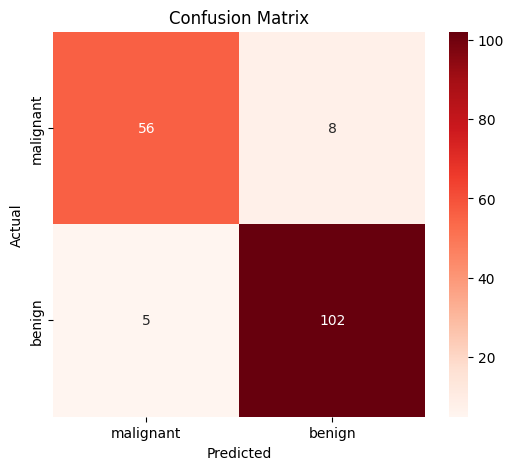

In [15]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

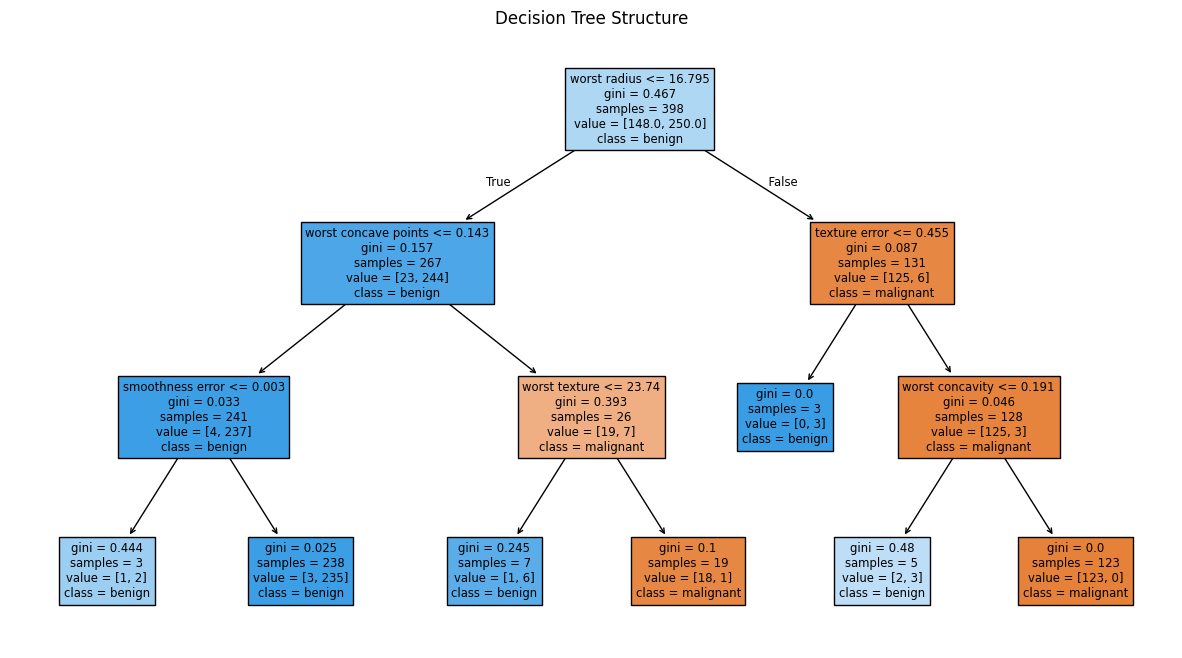

In [16]:
plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree Structure")
plt.show()